In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/My Drive/DataSets/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

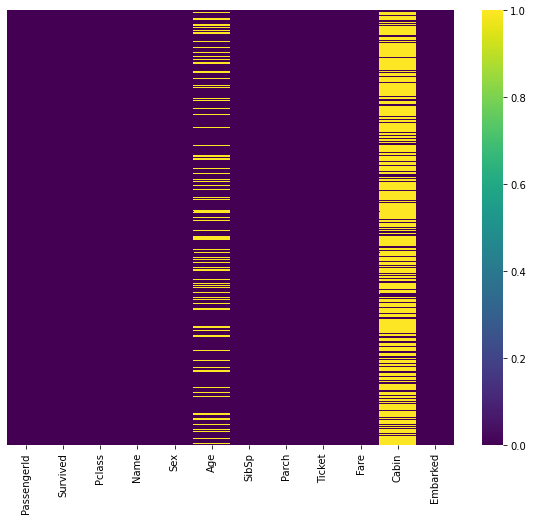

In [6]:
# see null values using seaborn heatmap function
plt.figure(figsize=(10,8))
sns.heatmap(data=df.isnull(),cmap="viridis",yticklabels=False,cbar=True)
plt.show()

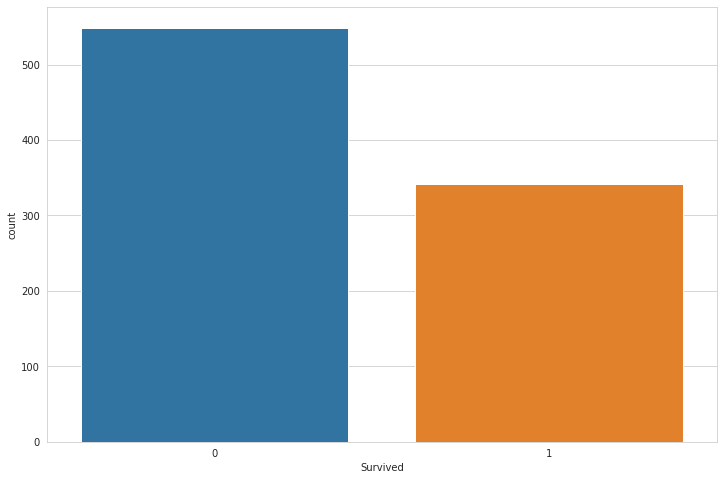

In [7]:
plt.figure(figsize=(12,8))
sns.set_style(style="whitegrid")
sns.countplot(x="Survived",data=df)
plt.show()

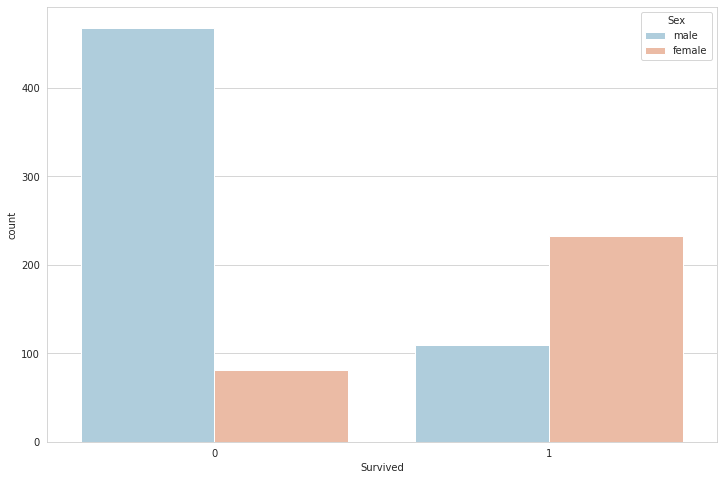

In [8]:
plt.figure(figsize=(12,8))
sns.set_style(style="whitegrid")
sns.countplot(x="Survived",hue="Sex",data=df,palette="RdBu_r")
plt.show()

In [9]:
print("Total class in Pclass column: ",len(df.Pclass.value_counts()))
df.Pclass.value_counts()

Total class in Pclass column:  3


3    491
1    216
2    184
Name: Pclass, dtype: int64

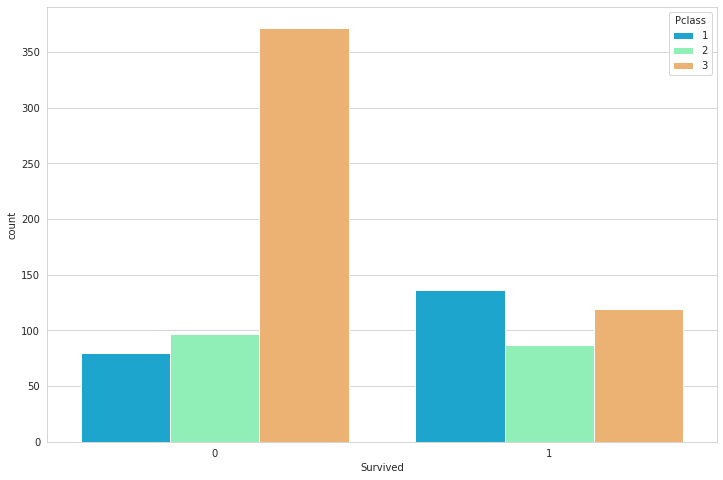

In [10]:
plt.figure(figsize=(12,8))
sns.set_style(style="whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=df,palette="rainbow")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


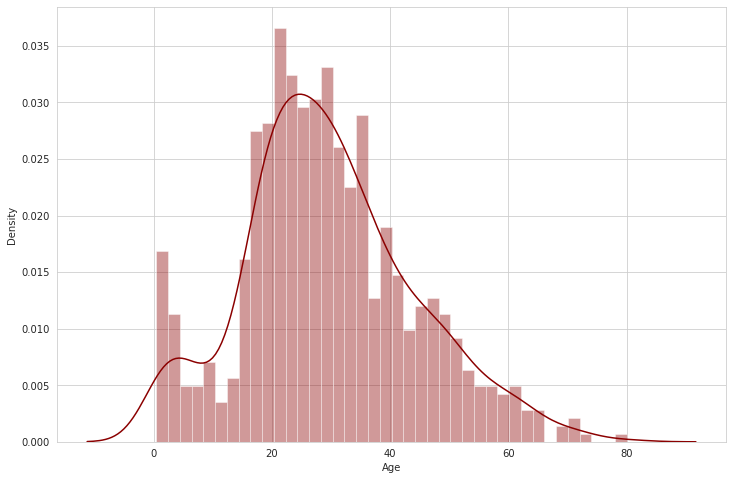

In [11]:
# to see data distribuation
plt.figure(figsize=(12,8))
sns.distplot(a=df.Age,bins=40,kde=True,color="darkred")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


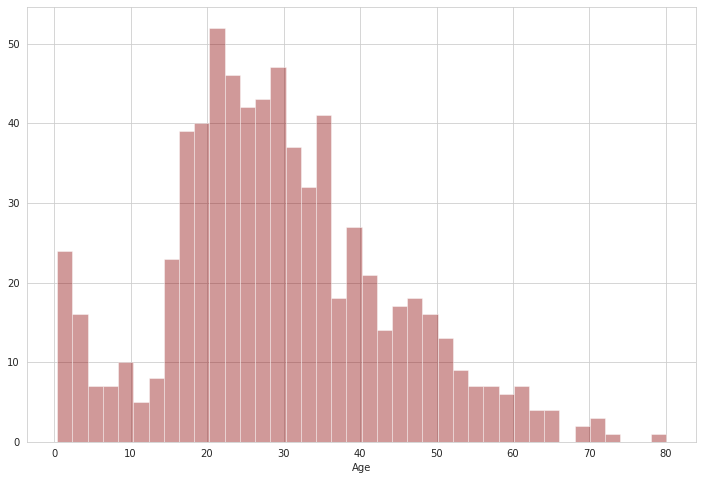

In [12]:
# to see data distribuation
plt.figure(figsize=(12,8))
sns.distplot(a=df.Age,bins=40,kde=False,color="darkred")
plt.show()

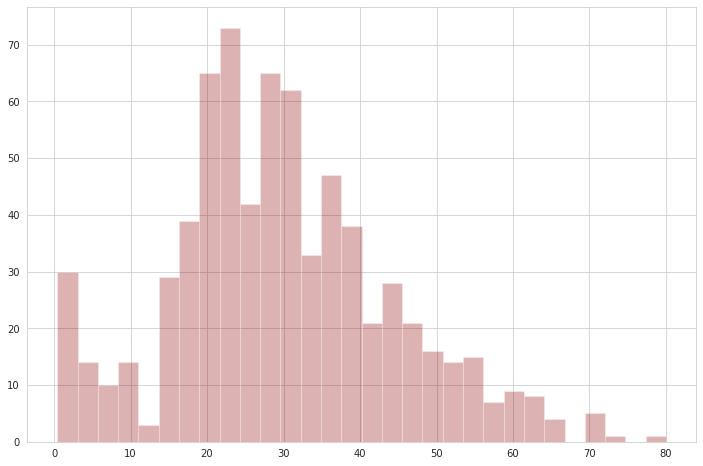

In [13]:
# antohter way to draw hist
plt.figure(figsize=(12,8))
df["Age"].hist(bins=30,color='darkred',alpha=0.3)
plt.show()

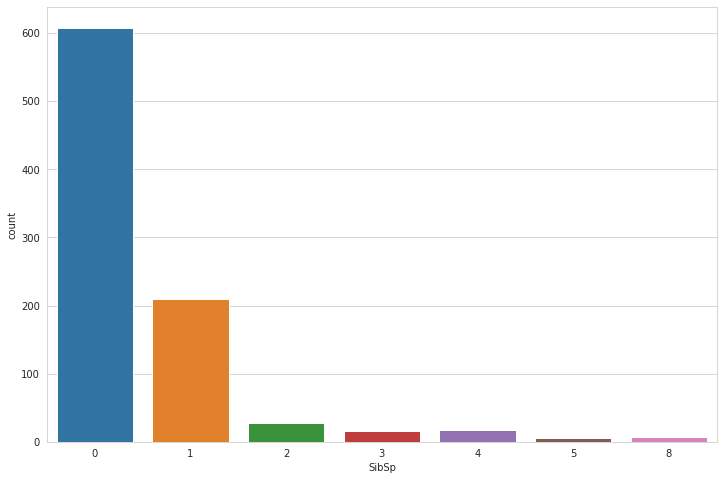

In [14]:
plt.figure(figsize=(12,8))
sns.set_style(style="whitegrid")
sns.countplot(x="SibSp",data=df)
plt.show()

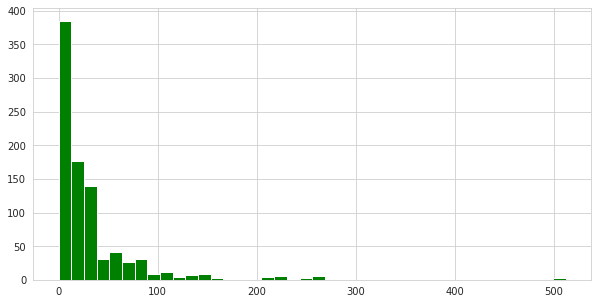

In [15]:
df['Fare'].hist(color='green',bins=40,figsize=(10,5))

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

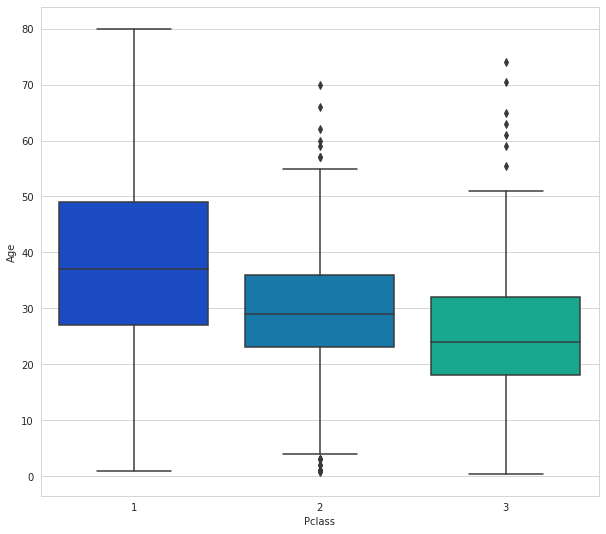

In [16]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Pclass",y="Age",data=df,palette="winter")
plt.show()

In [17]:
def impute_age(cols): # here cols contains ['Age','Pclass']
    Age = cols[0] # cols[0] means Age
    Pclass = cols[1] # cols[1] means Pclass
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

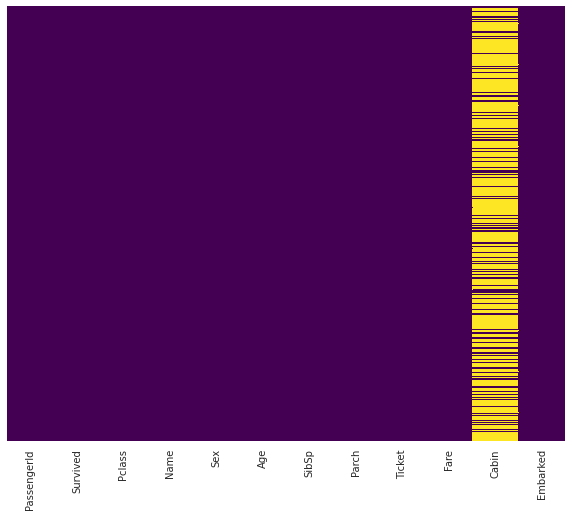

In [19]:
# After filling the missing value
plt.figure(figsize=(10,8))
sns.heatmap(data=df.isnull(),cmap="viridis",yticklabels=False,cbar=False)
plt.show()

In [20]:
df.drop(labels=["Cabin"],axis=1,inplace=True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


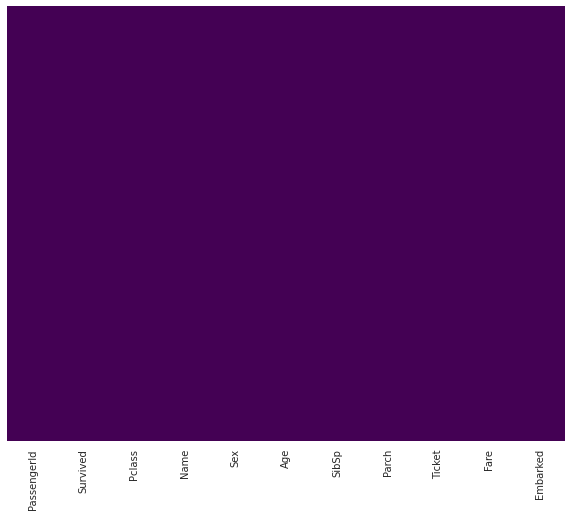

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.isnull(),cmap="viridis",yticklabels=False,cbar=False)
plt.show()

# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [24]:
pd.get_dummies(data=df["Embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
sex = pd.get_dummies(df["Sex"],drop_first=True)
embark = pd.get_dummies(df["Embarked"],drop_first=True)

In [27]:
df.drop(labels=['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [28]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [29]:
df = pd.concat([df,sex,embark],axis="columns")
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [30]:
df.shape

(891, 9)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
features = df.drop(labels=["Survived"],axis=1)
level = df["Survived"]

In [33]:
features.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [34]:
level

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(features,level,test_size=0.2,random_state=2020)

# Build model

In [45]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = log_model.predict(X=xtest)

In [47]:
log_model.score(X=xtest,y=ytest)

0.7541899441340782

In [48]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

# Evaluation the model

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [50]:
x = confusion_matrix(y_true=ytest,y_pred=y_pred)
x

array([[90, 15],
       [29, 45]])

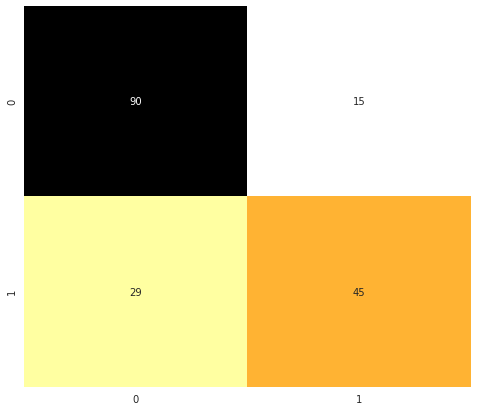

In [51]:
plt.figure(figsize=(8,7))
a = pd.DataFrame(x)
sns.heatmap(data=a,annot=True,cbar=False,cmap=plt.cm.afmhot_r)
plt.show()

In [52]:
accuracy = accuracy_score(y_true=ytest,y_pred=y_pred)
accuracy

0.7541899441340782

In [53]:
print(classification_report(y_true=ytest,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       105
           1       0.75      0.61      0.67        74

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179

